# Smith Creek Salinity Sections
2022-12-14 14:42:15

In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt

from scipy.interpolate import griddata

In [2]:
folderpath = os.path.join('Data', 'CastAway data April 5_2024')
filepath = os.path.join(folderpath, 'CC1320002_20240405_165739.csv')
filepath

'Data/CastAway data April 5_2024/CC1320002_20240405_165739.csv'

In [3]:
df_full = pd.read_csv(filepath, header = 28)
df_full.head()

,Time (Seconds),Pressure (Decibar),Temperature (Celsius),Conductivity (MicroSiemens per Centimeter)
0,0.2,0.000000,17.944113,0.0
1,0.4,-0.001262,17.934185,0.0
2,0.6,-0.002265,17.933558,0.0
3,0.8,-0.003270,17.946468,0.0
4,1.0,-0.001959,17.964382,0.0


KeyError: 'Salinity (Practical Salinity Scale)'

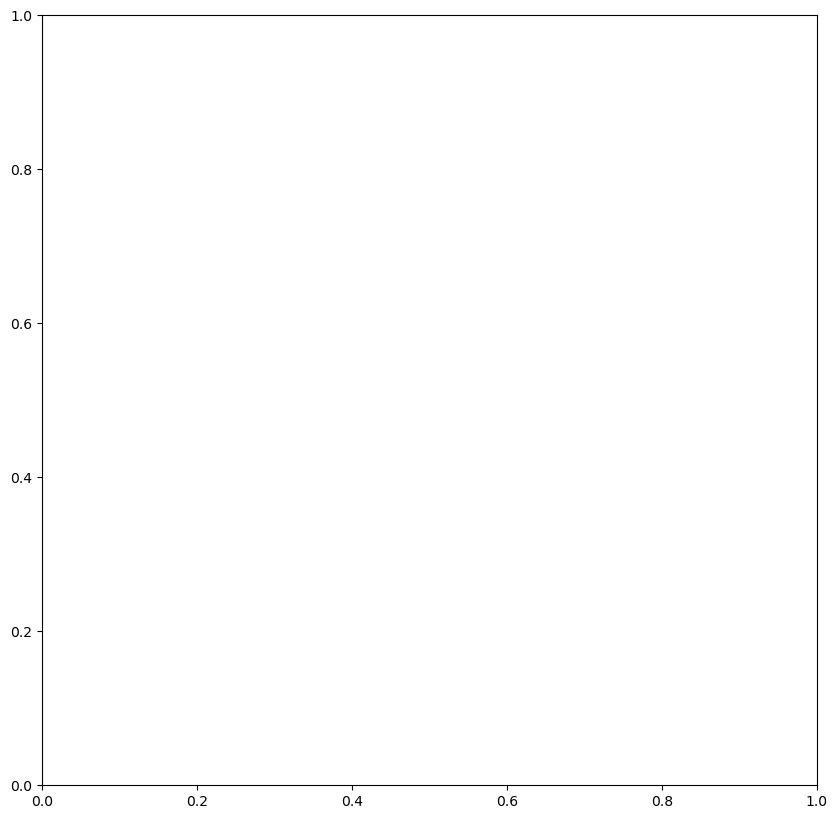

In [4]:
fig, axs = plt.subplots(figsize = (10, 10))

for filename in os.listdir(folderpath):
    f = os.path.join(folderpath, filename)
    df_full = pd.read_csv(f, header = 28)
    
    axs.plot(df_full['S alinity (Practical Salinity Scale)'], df_full['Depth (Meter)'])

axs.set_ylabel('Depth (m)')
axs.set_xlabel('Salinity (PSU)')
plt.gca().invert_yaxis() # Flip the y-axis

plt.savefig('SmithCreek_Profiles.png', dpi = 300)

### Create large df of all dfs
NB: location is arbitrary currently

In [73]:
dist = 1

# Create empty DF to fill iteratively
df_full = pd.DataFrame([])

# Sort files by name (time)
all_files = os.listdir(folderpath)
all_files.sort()
all_files

for filename in all_files:
    f = os.path.join(folderpath, filename)
    print(f)
    df_individ = pd.read_csv(f, header = 28)
    df_individ.loc[:, 'Distance (contrived)'] = np.ones(len(df_individ))*dist
    
    df_full = pd.concat([df_full, df_individ])
    
    dist += 1 # increment contrived distance
    
df_full

Data/Smith Creek Transect/CC1320002_20221214_161451.csv
Data/Smith Creek Transect/CC1320002_20221214_163855.csv
Data/Smith Creek Transect/CC1320002_20221214_170547.csv
Data/Smith Creek Transect/CC1320002_20221214_172446.csv
Data/Smith Creek Transect/CC1320002_20221214_173724.csv
Data/Smith Creek Transect/CC1320002_20221214_182335.csv
Data/Smith Creek Transect/CC1320002_20221214_185925.csv
Data/Smith Creek Transect/CC1320002_20221214_190759.csv
Data/Smith Creek Transect/CC1320002_20221214_192621.csv
Data/Smith Creek Transect/CC1320002_20221214_194215.csv
Data/Smith Creek Transect/CC1320002_20221214_195502.csv


,Pressure (Decibar),Depth (Meter),Temperature (Celsius),Conductivity (MicroSiemens per Centimeter),Specific conductance (MicroSiemens per Centimeter),Salinity (Practical Salinity Scale),Sound velocity (Meters per Second),Density (Kilograms per Cubic Meter),Distance (contrived)
0,0.15000,0.152944,9.646034,2323.100736,3352.621490,1.728666,1448.035925,1001.091625,1.0
1,0.45000,0.458840,9.647236,2325.839303,3356.457211,1.730753,1448.048102,1001.094586,1.0
2,0.75000,0.764733,9.647074,2327.626029,3359.051341,1.732156,1448.053992,1001.097133,1.0
3,1.05000,1.070625,9.646786,2325.821438,3356.475058,1.730744,1448.055877,1001.097484,1.0
4,1.35000,1.376517,9.647434,2327.156143,3358.338386,1.731754,1448.064506,1001.099651,1.0
...,...,...,...,...,...,...,...,...,...
21,6.45000,6.509862,14.035524,21844.341974,27980.080075,17.020483,1482.676659,1012.364116,11.0
22,6.75000,6.812352,14.035771,21841.968549,27976.863516,17.018288,1482.679854,1012.363758,11.0
23,7.05000,7.114841,14.035263,21843.040401,27978.600538,17.019359,1482.684279,1012.366041,11.0
24,7.35000,7.417330,14.032868,21831.458738,27965.481255,17.010483,1482.670651,1012.361017,11.0


In [74]:
n_grid = 100

salinity = df_full['Salinity (Practical Salinity Scale)']
distance = df_full['Distance (contrived)']
depth = df_full['Depth (Meter)']

plotVar = salinity

dist_vec_unique = np.linspace(np.min(distance), np.max(distance), n_grid) # just for gridding
depth_vec_unique = np.linspace(np.min(depth), np.max(depth), n_grid) # just for gridding

dist_grid, depth_grid = np.meshgrid(dist_vec_unique, depth_vec_unique)
plotVar_grid = griddata((distance, depth), plotVar, (dist_grid, depth_grid), method = 'linear')

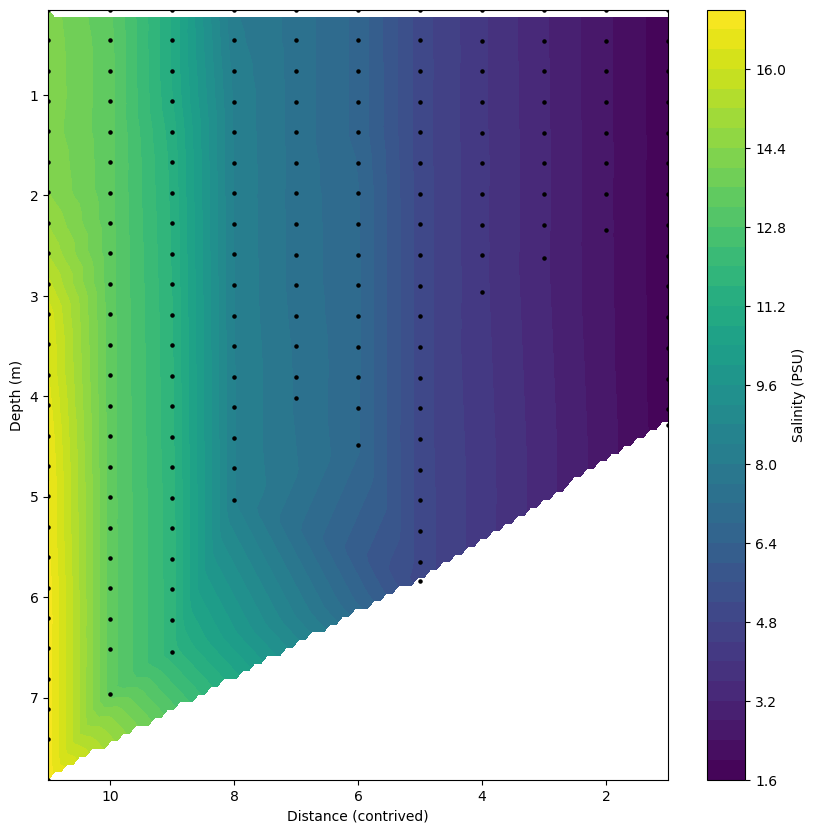

In [82]:
fig, axs = plt.subplots(figsize = (10, 10))
im = plt.contourf(dist_grid, depth_grid, plotVar_grid, levels = 40)#, levels = cvec, cmap=myCM, extend="both"))

sc = plt.scatter(distance, depth, c = 'black', s = 5, alpha = 1)
#                cmap=myCM, alpha = 1, vmin=vmn, vmax=vmx)

axs.set_ylabel('Depth (m)')
axs.set_xlabel('Distance (contrived)')
plt.gca().invert_yaxis() # Flip the y-axis
plt.gca().invert_xaxis() # Flip the x-axis for now, since Cape Fear River is W edge

cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Salinity (PSU)')

plt.savefig('SmithCreek_SaltWedgy.png', dpi = 300)

['CC1320002_20221214_161451.csv',
 'CC1320002_20221214_163855.csv',
 'CC1320002_20221214_170547.csv',
 'CC1320002_20221214_172446.csv',
 'CC1320002_20221214_173724.csv',
 'CC1320002_20221214_182335.csv',
 'CC1320002_20221214_185925.csv',
 'CC1320002_20221214_190759.csv',
 'CC1320002_20221214_192621.csv',
 'CC1320002_20221214_194215.csv',
 'CC1320002_20221214_195502.csv']